In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sof = pd.read_csv('survey_results_public.csv')
sof_schema = pd.read_csv('survey_results_schema.csv')

In [3]:
sof

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73263,73264,I am a developer by profession,"Employed, full-time",Fully remote,Freelance/contract work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Blogs;Written Tutorial...,Udemy,8,...,30-60 minutes a day,Less than 15 minutes a day,Just right,DevOps function;Microservices;Developer portal...,Yes,Yes,Yes,Too long,Easy,NaN
73264,73265,I am a developer by profession,"Employed, full-time",Full in-person,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,Coursera;Udemy;Udacity,6,...,15-30 minutes a day,60-120 minutes a day,Very long,None of these,No,Yes,Yes,Too long,Easy,NaN
73265,73266,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby;School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Programming Games;Stac...,Udemy;Codecademy;Pluralsight;edX,42,...,30-60 minutes a day,60-120 minutes a day,Just right,None of these,No,No,No,Appropriate in length,Easy,NaN
73266,73267,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;On the job training,NaN,NaN,50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN


In [5]:
sof.set_index('ResponseId', inplace = True)

In [6]:
sof.index

Index([    1,     2,     3,     4,     5,     6,     7,     8,     9,    10,
       ...
       73259, 73260, 73261, 73262, 73263, 73264, 73265, 73266, 73267, 73268],
      dtype='int64', name='ResponseId', length=73268)

In [7]:
sof_schema

,qid,qname,question,force_resp,type,selector
0,QID16,S0,"<div><span style=""font-size:19px;""><strong>Hel...",False,DB,TB
1,QID12,MetaInfo,Browser Meta Info,False,Meta,Browser
2,QID1,S1,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
3,QID2,MainBranch,Which of the following options best describes ...,True,MC,SAVR
4,QID296,Employment,Which of the following best describes your cur...,False,MC,MAVR
...,...,...,...,...,...,...
74,QID290,Frequency_2,Interacting with people outside of your immedi...,NaN,MC,MAVR
75,QID290,Frequency_3,Encountering knowledge silos (where one indivi...,NaN,MC,MAVR
76,QID294,TrueFalse_1,Are you involved in supporting new hires durin...,NaN,MC,MAVR
77,QID294,TrueFalse_2,Do you use learning resources provided by your...,NaN,MC,MAVR


In [8]:
sof.columns

Index(['MainBranch', 'Employment', 'RemoteWork', 'CodingActivities', 'EdLevel',
       'LearnCode', 'LearnCodeOnline', 'LearnCodeCoursesCert', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool',
       'Country', 'Currency', 'CompTotal', 'CompFreq',
       'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith',
       'OpSysProfessional use', 'OpSysPersonal use', 'VersionControlSystem',
       'VCInteraction', 'VCHostingPersonal use', 'VCHostingProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWorkedWith', 'OfficeStack

In [18]:
type_of_employment = sof['Employment'].value_counts()[:10]

In [13]:
sof['Gender'] = sof['Gender'].replace(to_replace = ['Non-binary, genderqueer, or gender non-conforming',
                                                   'Or, in your own words:',
                                                   'Man;Non-binary, genderqueer, or gender non-conforming',
                                                   'Man;Or, in your own words:',
                                                   'Woman;Non-binary, genderqueer, or gender non-conforming',
                                                   'Man;Woman;Non-binary, genderqueer, or gender non-conforming',
                                                   'Man;Woman',
                                                   'Man;Or, in your own words:;Woman;Non-binary, genderqueer, or gender non-conforming',
                                                   'Or, in your own words:;Woman;Non-binary, genderqueer, or gender non-conforming',
                                                   'Or, in your own words:;Non-binary, genderqueer, or gender non-conforming',
                                                   'Or, in your own words:;Woman',
                                                   'Man;Or, in your own words:;Non-binary, genderqueer, or gender non-conforming',
                                                   'Man;Or, in your own words:;Woman'],value = 'Others')

In [19]:
sof['Gender'].value_counts()

Gender
Man                  64607
Woman                 3399
Others                1675
Prefer not to say     1172
Name: count, dtype: int64

In [25]:
sof['RemoteWork'].value_counts()

RemoteWork
Fully remote                            25341
Hybrid (some remote, some in-person)    25021
Full in-person                           8596
Name: count, dtype: int64

In [26]:
sof['EdLevel'].value_counts()

EdLevel
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          30276
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       15486
Some college/university study without earning a degree                                 9326
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     7904
Associate degree (A.A., A.S., etc.)                                                    2236
Other doctoral degree (Ph.D., Ed.D., etc.)                                             2169
Primary/elementary school                                                              1806
Something else                                                                         1247
Professional degree (JD, MD, etc.)                                                     1121
Name: count, dtype: int64

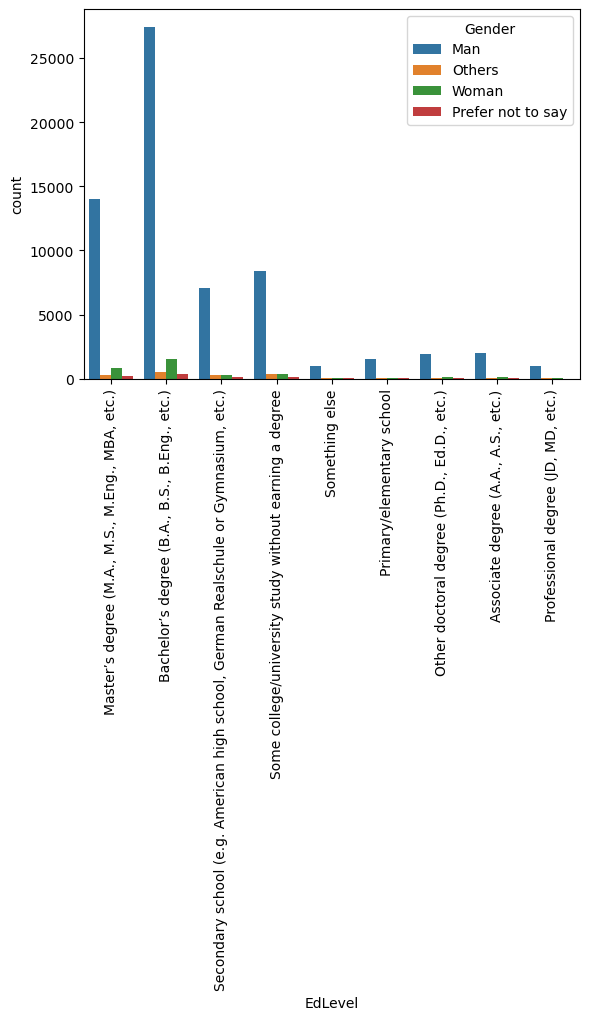

In [29]:
sns.countplot(data = sof,
             x = 'EdLevel', hue = 'Gender')
plt.xticks(rotation = 90)
plt.show()

In [31]:
sof_schema.set_index('qname', inplace = True)

In [33]:
sof_schema.loc['CompTotal']['question']

'What is your current total compensation (salary, bonuses, and perks, before taxes and deductions)? Please enter a whole number in the box below, without any punctuation.  If you are paid hourly, please estimate an equivalent weekly, monthly, or yearly salary. If you prefer not to answer, please leave the box empty.'

In [34]:
sof['CompTotal']

ResponseId
1             NaN
2             NaN
3         32000.0
4         60000.0
5             NaN
           ...   
73264     60000.0
73265    107000.0
73266         NaN
73267     58500.0
73268         NaN
Name: CompTotal, Length: 73268, dtype: float64

In [36]:
sof['CompFreq'].value_counts()

CompFreq
Yearly     23267
Monthly    19983
Weekly      1175
Name: count, dtype: int64

In [38]:
sof['ConvertedCompYearly']

ResponseId
1             NaN
2             NaN
3         40205.0
4        215232.0
5             NaN
           ...   
73264         NaN
73265         NaN
73266         NaN
73267         NaN
73268         NaN
Name: ConvertedCompYearly, Length: 73268, dtype: float64

In [40]:
sof['YearsCode'].unique()

array([nan, '14', '20', '8', '15', '3', '1', '6', '37', '5', '12', '22',
       '11', '4', '7', '13', '36', '2', '25', '10', '40', '16', '27',
       '24', '19', '9', '17', '18', '26', 'More than 50 years', '29',
       '30', '32', 'Less than 1 year', '48', '45', '38', '39', '28', '23',
       '43', '21', '41', '35', '50', '33', '31', '34', '46', '44', '42',
       '47', '49'], dtype=object)

In [41]:
sof['YearsCode'] = sof['YearsCode'].replace('More than 50 years', 51)
sof['YearsCode'] = sof['YearsCode'].replace('Less than 1 year', 0)
sof['YearsCode'].unique()

array([nan, '14', '20', '8', '15', '3', '1', '6', '37', '5', '12', '22',
       '11', '4', '7', '13', '36', '2', '25', '10', '40', '16', '27',
       '24', '19', '9', '17', '18', '26', 51, '29', '30', '32', 0, '48',
       '45', '38', '39', '28', '23', '43', '21', '41', '35', '50', '33',
       '31', '34', '46', '44', '42', '47', '49'], dtype=object)

In [42]:
sof['YearsCode'] = sof['YearsCode'].astype(float)

<Axes: xlabel='YearsCode', ylabel='ConvertedCompYearly'>

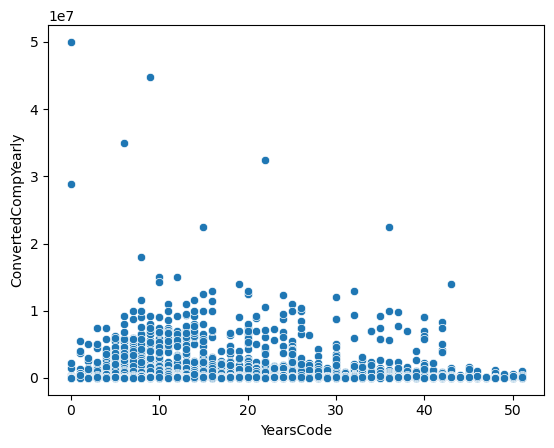

In [45]:
sns.scatterplot(data = sof,
               y = 'ConvertedCompYearly',
               x = 'YearsCode')

In [46]:
languages = sof[['LanguageHaveWorkedWith', 'LanguageWantToWorkWith','DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
'PlatformHaveWorkedWith', 'PlatformWantToWorkWith']]
languages

,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith
ResponseId,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN
2,JavaScript;TypeScript,Rust;TypeScript,NaN,NaN,NaN,NaN
3,C#;C++;HTML/CSS;JavaScript;Python,C#;C++;HTML/CSS;JavaScript;TypeScript,Microsoft SQL Server,Microsoft SQL Server,NaN,NaN
4,C#;JavaScript;SQL;TypeScript,C#;SQL;TypeScript,Microsoft SQL Server,Microsoft SQL Server,NaN,NaN
5,C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript,C#;Elixir;F#;Go;JavaScript;Rust;TypeScript,Cloud Firestore;Elasticsearch;Microsoft SQL Se...,Cloud Firestore;Elasticsearch;Firebase Realtim...,Firebase;Microsoft Azure,Firebase;Microsoft Azure
...,...,...,...,...,...,...
73264,Bash/Shell;Dart;JavaScript;PHP;Python;SQL;Type...,Bash/Shell;Go;JavaScript;Python;SQL;TypeScript,Elasticsearch;MySQL;PostgreSQL;Redis,MySQL;PostgreSQL;Redis,AWS;DigitalOcean;Google Cloud,AWS;DigitalOcean;Google Cloud
73265,Bash/Shell;HTML/CSS;JavaScript;Python;SQL,HTML/CSS;JavaScript;Python,Elasticsearch;MongoDB;Oracle;SQLite,Elasticsearch;Neo4j;SQLite,NaN,NaN
73266,HTML/CSS;JavaScript;PHP;Python;SQL,C#;HTML/CSS;JavaScript;PHP;Python;SQL,MariaDB;Microsoft SQL Server;MySQL;PostgreSQL;...,MariaDB;Microsoft SQL Server;MySQL;PostgreSQL;...,Managed Hosting;Microsoft Azure;VMware,Firebase;Linode;Managed Hosting;Microsoft Azur...


In [50]:
gender_group = sof.groupby('Gender')
man_languages = gender_group.get_group('Man')['LanguageHaveWorkedWith']

In [56]:
from collections import Counter
man_counter = Counter()

for response in man_languages.dropna().values:
    man_counter.update(response.split(';'))

In [59]:
languages = []
people = []
for item in man_counter.most_common():
    languages.append(item[0])
    people.append(item[1])

Text(0, 0.5, 'People Count')

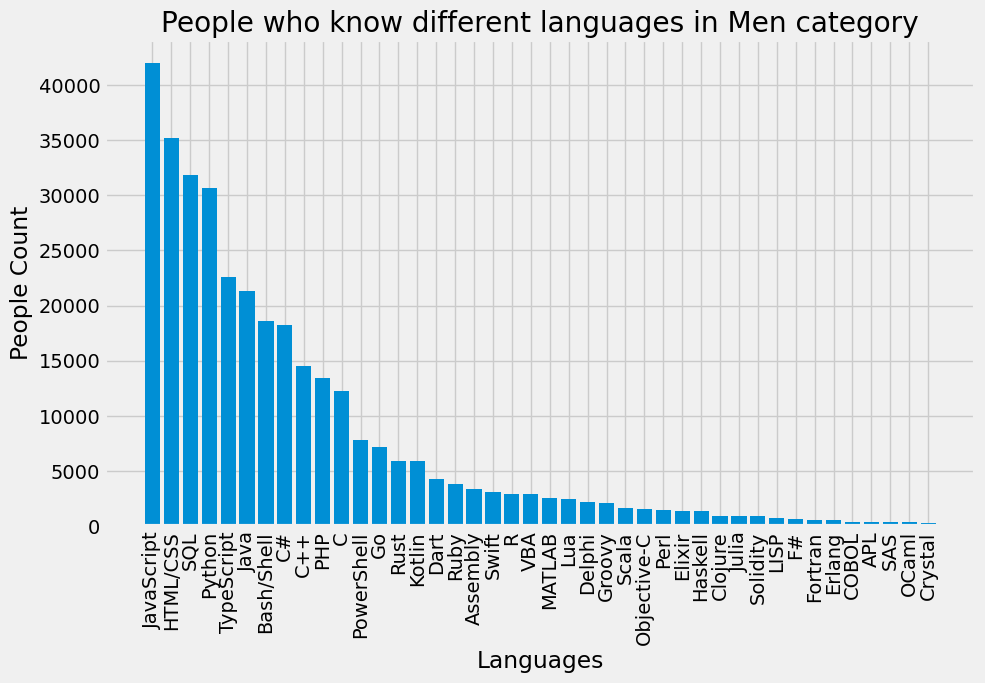

In [70]:
plt.figure(figsize = (10, 6))
plt.style.use('fivethirtyeight')
plt.bar(languages,people)
plt.xticks(rotation = 90)
plt.title('People who know different languages in Men category')
plt.xlabel('Languages')
plt.ylabel('People Count')

In [71]:
woman_languages = gender_group.get_group('Woman')['LanguageHaveWorkedWith']

In [72]:
woman_counter = Counter()

for response in woman_languages.dropna().values:
    woman_counter.update(response.split(';'))

    
languages = []
people = []
for item in woman_counter.most_common():
    languages.append(item[0])
    people.append(item[1])

Text(0, 0.5, 'People Count')

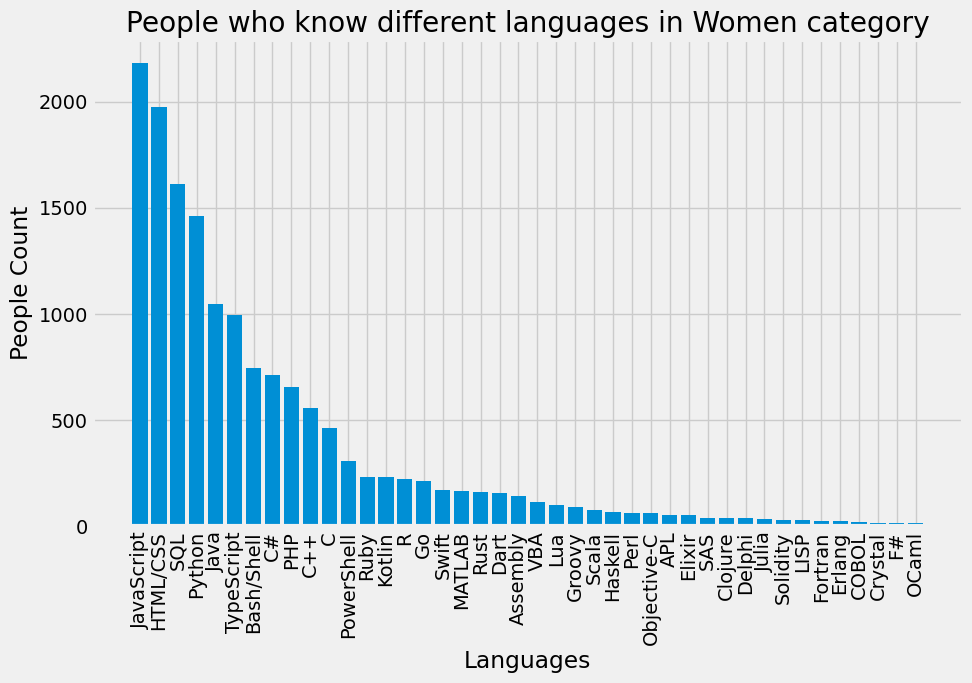

In [73]:
plt.figure(figsize = (10, 6))
plt.style.use('fivethirtyeight')
plt.bar(languages,people)
plt.xticks(rotation = 90)
plt.title('People who know different languages in Women category')
plt.xlabel('Languages')
plt.ylabel('People Count')

In [74]:
others_languages = gender_group.get_group('Others')['LanguageHaveWorkedWith']

In [75]:
others_counter = Counter()

for response in others_languages.dropna().values:
    others_counter.update(response.split(';'))

    
languages = []
people = []
for item in others_counter.most_common():
    languages.append(item[0])
    people.append(item[1])

Text(0, 0.5, 'People Count')

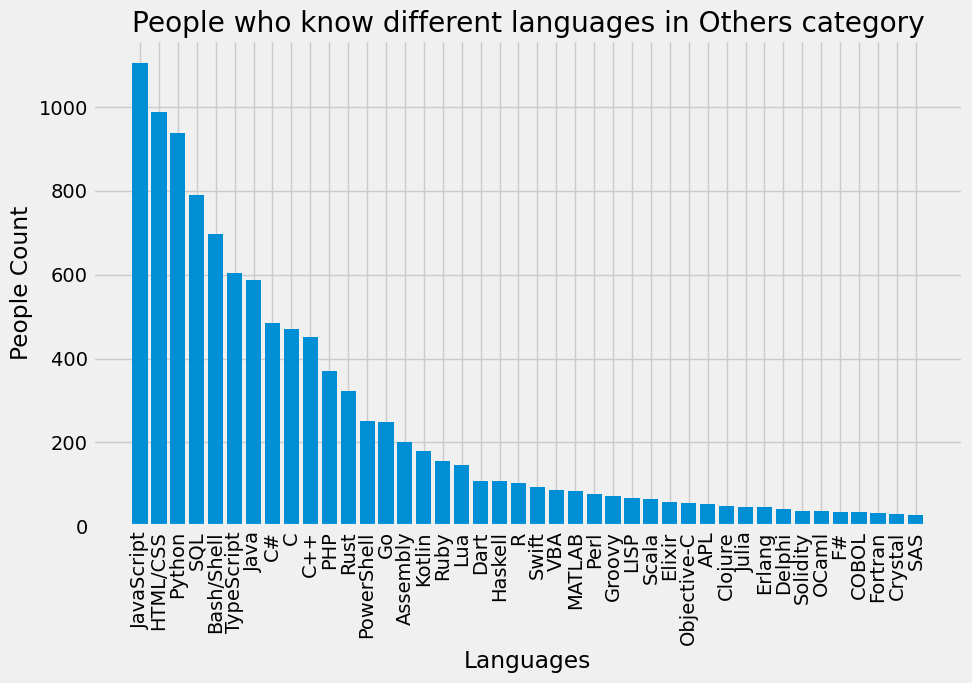

In [76]:
plt.figure(figsize = (10, 6))
plt.style.use('fivethirtyeight')
plt.bar(languages,people)
plt.xticks(rotation = 90)
plt.title('People who know different languages in Others category')
plt.xlabel('Languages')
plt.ylabel('People Count')

In [78]:
gender_group['ConvertedCompYearly'].mean()

Gender
Man                  169166.222358
Others               179289.149051
Prefer not to say    366440.390671
Woman                154148.132086
Name: ConvertedCompYearly, dtype: float64

In [81]:
gender_group['ConvertedCompYearly'].mean().index

Index(['Man', 'Others', 'Prefer not to say', 'Woman'], dtype='object', name='Gender')

In [82]:
gender_group['ConvertedCompYearly'].mean().values

array([169166.22235816, 179289.14905149, 366440.39067055, 154148.1320865 ])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


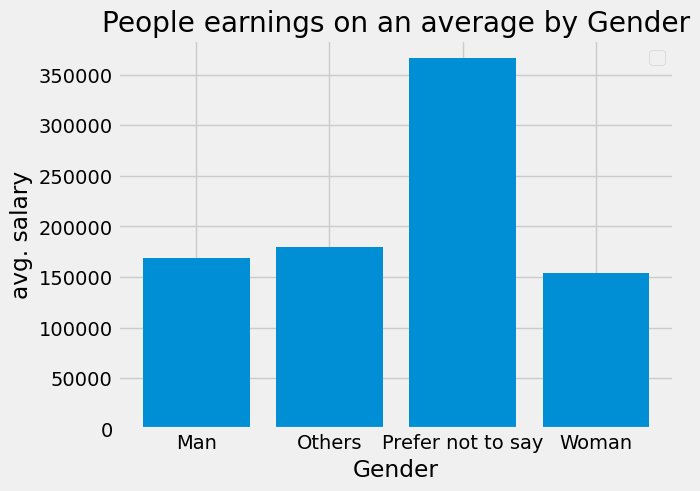

In [85]:
plt.bar(gender_group['ConvertedCompYearly'].mean().index,
       gender_group['ConvertedCompYearly'].mean().values)
plt.title('People earnings on an average by Gender')
plt.xlabel('Gender')
plt.ylabel('avg. salary')
plt.legend()

In [88]:
sof[(sof['Country'] == 'India') & (sof['Gender'] == 'Man')]

,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
ResponseId,,,,,,,,,,,,,,,,,,,,,
7,I code primarily as a hobby,"Student, part-time",NaN,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Stack Overflow;Video-based Online Courses,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN
8,I am a developer by profession,"Not employed, but looking for work",NaN,NaN,Some college/university study without earning ...,Online Courses or Certification,NaN,Coursera;Udemy,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN
66,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Other (please specify):,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Stack Overflow;Video-based Online Courses;Inte...,Udemy,3.0,2,...,30-60 minutes a day,15-30 minutes a day,Just right,Microservices;Continuous integration (CI) and ...,No,Yes,Yes,Too long,Easy,NaN
141,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Written Tutorials;Stac...,NaN,13.0,12,...,30-60 minutes a day,30-60 minutes a day,Just right,DevOps function;Microservices;Developer portal...,Yes,Yes,Yes,Appropriate in length,Neither easy nor difficult,NaN
152,I am a developer by profession,"Employed, full-time",Full in-person,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;W...,Udemy;Pluralsight;Udacity,12.0,12,...,30-60 minutes a day,Less than 15 minutes a day,Somewhat long,None of these,Yes,Yes,Yes,Appropriate in length,Neither easy nor difficult,15480.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73185,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Online Courses or Certification,NaN,edX,8.0,5,...,Over 120 minutes a day,30-60 minutes a day,Just right,Innersource initiative;DevOps function;Microse...,No,Yes,No,Appropriate in length,Easy,NaN
73194,"I used to be a developer by profession, but no...","Employed, full-time",Fully remote,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Stack Overflow;Video-b...,Coursera;Udemy,20.0,18,...,15-30 minutes a day,15-30 minutes a day,Somewhat long,DevOps function;Microservices;Developer portal...,Yes,Yes,Yes,Appropriate in length,Easy,NaN
73256,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Freelance/contract work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,14.0,7,...,60-120 minutes a day,Less than 15 minutes a day,Somewhat long,DevOps function;Microservices;Continuous integ...,Yes,Yes,Yes,Too long,Neither easy nor difficult,NaN


In [90]:
sof[(sof['Country'] == 'India') & (sof['Gender'] == 'Man')]['ConvertedCompYearly'].mean()

52662.285852713176

In [91]:
sof[(sof['Country'] == 'India') & (sof['Gender'] == 'Woman')]['ConvertedCompYearly'].mean()

26606.2

In [92]:
sof[(sof['Country'] == 'India') & (sof['Gender'] == 'Others')]['ConvertedCompYearly'].mean()

18311.833333333332

In [93]:
sof[(sof['Country'] == 'India') & (sof['Gender'] == 'Prefer not to say')]['ConvertedCompYearly'].mean()

54668.11111111111

In [95]:
country_group = sof.groupby('Country')
country_group['ConvertedCompYearly'].mean()

Country
Afghanistan                             33914.666667
Albania                                 24895.148148
Algeria                                 12732.888889
Andorra                                 98003.125000
Angola                                   6222.750000
                                            ...     
Venezuela, Bolivarian Republic of...    17079.400000
Viet Nam                                37707.563830
Yemen                                   17464.666667
Zambia                                   8452.000000
Zimbabwe                                87596.000000
Name: ConvertedCompYearly, Length: 180, dtype: float64

In [97]:
country_group['ConvertedCompYearly'].mean().sort_values(ascending = False)[:15]

Country
Monaco                                                  5.000000e+06
Haiti                                                   1.560600e+06
Barbados                                                4.518910e+05
Thailand                                                4.071673e+05
United States of America                                3.849382e+05
Ireland                                                 2.589300e+05
New Zealand                                             2.427352e+05
Canada                                                  2.287423e+05
Switzerland                                             2.262003e+05
Australia                                               2.239415e+05
Portugal                                                2.044590e+05
United Kingdom of Great Britain and Northern Ireland    1.955091e+05
Benin                                                   1.856653e+05
Singapore                                               1.833204e+05
Cyprus                    

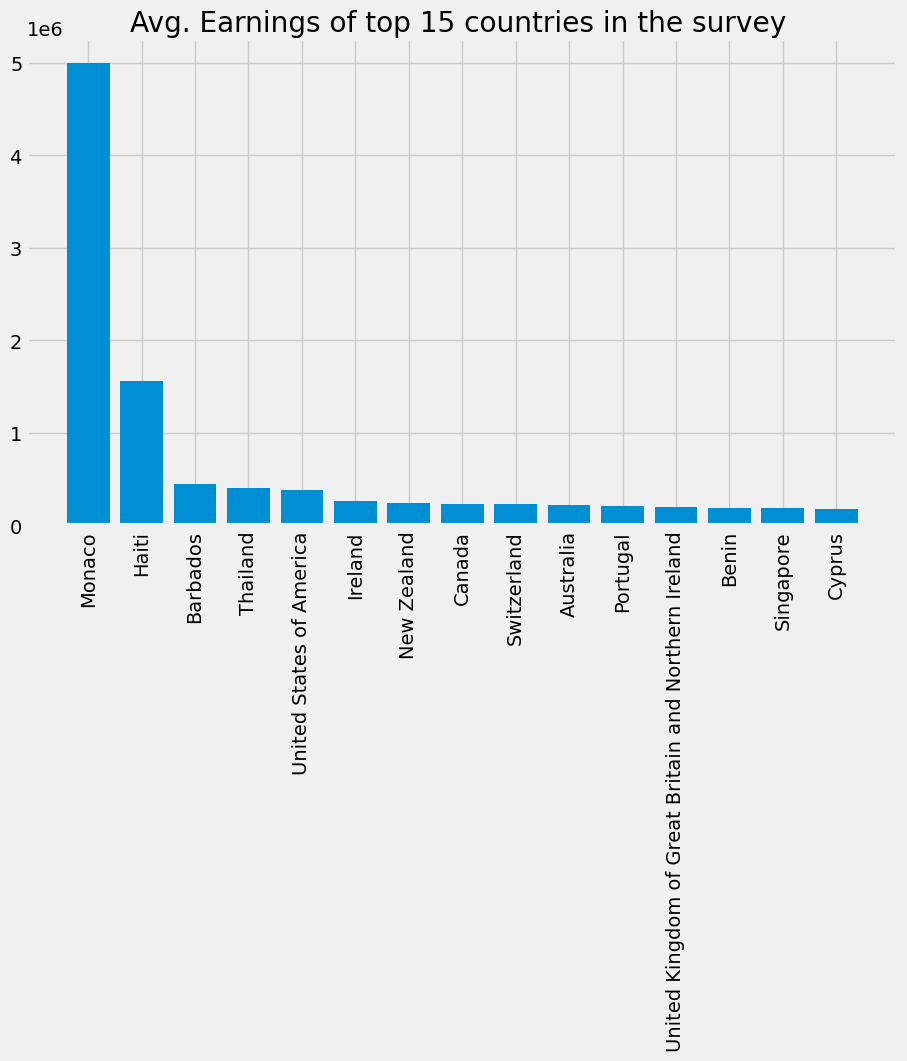

In [101]:
plt.figure(figsize = (10, 6))
plt.bar(country_group['ConvertedCompYearly'].mean().sort_values(ascending = False)[:15].index,
       country_group['ConvertedCompYearly'].mean().sort_values(ascending = False)[:15].values)
plt.title('Avg. Earnings of top 15 countries in the survey ')
plt.xticks(rotation = 90)
plt.show()

In [104]:
sof['Country'].value_counts()

Country
United States of America                                13543
India                                                    6639
Germany                                                  5395
United Kingdom of Great Britain and Northern Ireland     4190
Canada                                                   2490
                                                        ...  
Monaco                                                      1
Djibouti                                                    1
Seychelles                                                  1
Solomon Islands                                             1
Saint Kitts and Nevis                                       1
Name: count, Length: 180, dtype: int64

In [105]:
len(sof['Country'].value_counts())

180

In [106]:
sof['Country'].value_counts()[:15]

Country
United States of America                                13543
India                                                    6639
Germany                                                  5395
United Kingdom of Great Britain and Northern Ireland     4190
Canada                                                   2490
France                                                   2328
Brazil                                                   2109
Poland                                                   1732
Netherlands                                              1555
Spain                                                    1521
Italy                                                    1514
Australia                                                1462
Russian Federation                                       1229
Turkey                                                   1020
Sweden                                                   1020
Name: count, dtype: int64

In [107]:
top_15_countries = sof['Country'].value_counts()[:15]

In [119]:
country_group['ConvertedCompYearly'].mean().loc[sof['Country'].value_counts()[:15].index]

Country
United States of America                                384938.176639
India                                                    51443.079613
Germany                                                 115087.296703
United Kingdom of Great Britain and Northern Ireland    195509.080166
Canada                                                  228742.255908
France                                                   91451.553701
Brazil                                                   47167.116913
Poland                                                   63942.163767
Netherlands                                             115814.032222
Spain                                                   101209.420683
Italy                                                   118866.131773
Australia                                               223941.546218
Russian Federation                                       48846.475655
Turkey                                                   29681.923937
Sweden      

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


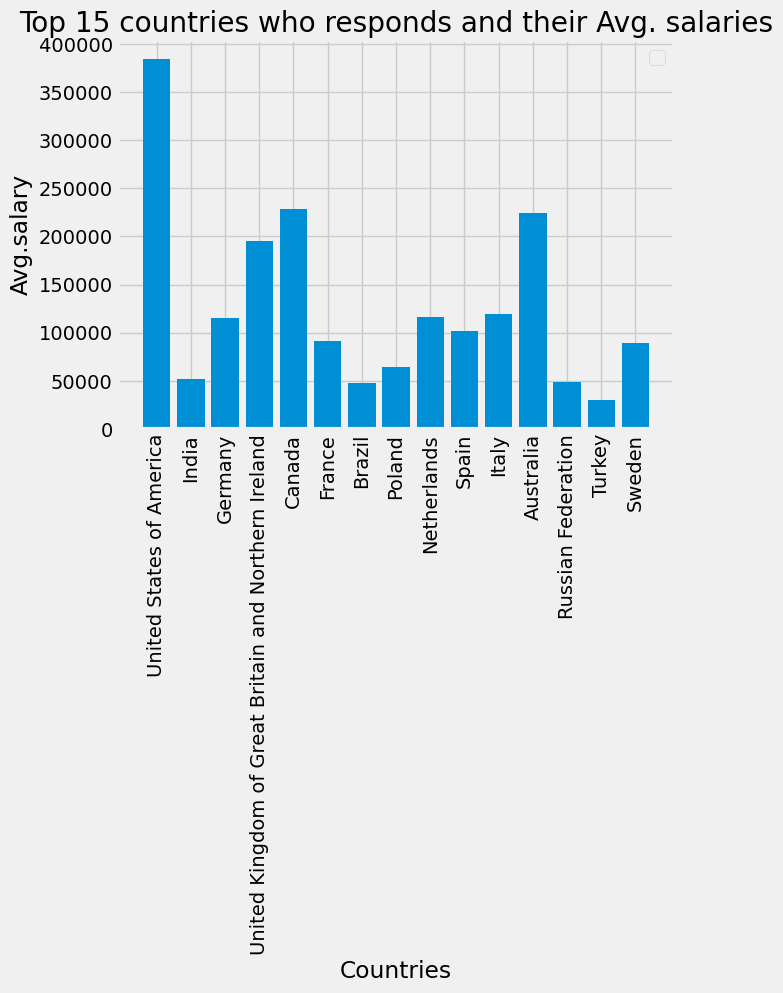

In [122]:
plt.bar(country_group['ConvertedCompYearly'].mean().loc[sof['Country'].value_counts()[:15].index].index,
        country_group['ConvertedCompYearly'].mean().loc[sof['Country'].value_counts()[:15].index].values)
plt.title('Top 15 countries who responds and their Avg. salaries')
plt.xlabel('Countries')
plt.ylabel('Avg.salary')
plt.xticks(rotation = 90)
plt.legend()

In [124]:
country_group['LanguageHaveWorkedWith'].str.contains('Python')

AttributeError: 'SeriesGroupBy' object has no attribute 'str'

In [125]:
country_group['LanguageHaveWorkedWith'].apply(lambda x : x.str.contains('Python'))

Country      ResponseId
Afghanistan  1960          False
             2449           True
             2738          False
             3642          False
             3776          False
                           ...  
Zimbabwe     66478         False
             68960         False
             71358          True
             71980         False
             72145           NaN
Name: LanguageHaveWorkedWith, Length: 71771, dtype: object

In [126]:
country_group['LanguageHaveWorkedWith'].apply(lambda x : x.str.contains('Python').sum())

Country
Afghanistan                              25
Albania                                  19
Algeria                                  19
Andorra                                   4
Angola                                    3
                                       ... 
Venezuela, Bolivarian Republic of...     52
Viet Nam                                136
Yemen                                     4
Zambia                                    6
Zimbabwe                                 11
Name: LanguageHaveWorkedWith, Length: 180, dtype: int64

In [127]:
country_group['LanguageHaveWorkedWith'].apply(lambda x : x.str.contains('Python').sum()).reset_index()

,Country,LanguageHaveWorkedWith
0,Afghanistan,25
1,Albania,19
2,Algeria,19
3,Andorra,4
4,Angola,3
...,...,...
175,"Venezuela, Bolivarian Republic of...",52
176,Viet Nam,136
177,Yemen,4
178,Zambia,6


In [131]:
python_knows = country_group['LanguageHaveWorkedWith'].apply(lambda x : x.str.contains('Python').sum()).reset_index()
python_knows.set_index('Country', inplace = True)

In [132]:
python_knows

,LanguageHaveWorkedWith
Country,
Afghanistan,25
Albania,19
Algeria,19
Andorra,4
Angola,3
...,...
"Venezuela, Bolivarian Republic of...",52
Viet Nam,136
Yemen,4


In [137]:
country_group['LanguageHaveWorkedWith'].apply(lambda x : x.str.contains('Java').sum()).reset_index()

,Country,LanguageHaveWorkedWith
0,Afghanistan,49
1,Albania,46
2,Algeria,25
3,Andorra,9
4,Angola,8
...,...,...
175,"Venezuela, Bolivarian Republic of...",102
176,Viet Nam,233
177,Yemen,8
178,Zambia,12


In [138]:
country_group['ConvertedCompYearly'].agg(['mean', 'median'])

,mean,median
Country,,
Afghanistan,33914.666667,10894.0
Albania,24895.148148,15360.0
Algeria,12732.888889,7440.0
Andorra,98003.125000,76784.0
Angola,6222.750000,3073.5
...,...,...
"Venezuela, Bolivarian Republic of...",17079.400000,12000.0
Viet Nam,37707.563830,11388.0
Yemen,17464.666667,15000.0


In [147]:
india = country_group.get_group('India')
india['LanguageHaveWorkedWith'].str.contains('JavaScript').sum()

4205

In [151]:
india.groupby('Gender')['LanguageHaveWorkedWith'].apply(lambda x : x.str.contains('JavaScript').sum())

Gender
Man                  3854
Others                 19
Prefer not to say      72
Woman                 184
Name: LanguageHaveWorkedWith, dtype: int64

In [157]:
sof.groupby(['Gender', 'Country'])['LanguageHaveWorkedWith'].apply(lambda x : x.str.contains('JavaScript').sum())

Gender  Country                             
Man     Afghanistan                             21
        Albania                                 31
        Algeria                                 23
        Andorra                                  3
        Angola                                   7
                                                ..
Woman   Uruguay                                  4
        Venezuela, Bolivarian Republic of...     8
        Viet Nam                                 5
        Yemen                                    1
        Zimbabwe                                 0
Name: LanguageHaveWorkedWith, Length: 507, dtype: int64

In [158]:
python_df = sof.groupby(['Gender', 'Country'])['LanguageHaveWorkedWith'].apply(lambda x : x.str.contains('Python').sum()).reset_index()

In [161]:
python_df.sort_values(by = 'LanguageHaveWorkedWith', ascending = False)

,Gender,Country,LanguageHaveWorkedWith
169,Man,United States of America,6050
66,Man,India,2819
55,Man,Germany,2432
167,Man,United Kingdom of Great Britain and Northern I...,1826
27,Man,Canada,1099
...,...,...,...
283,Prefer not to say,Antigua and Barbuda,0
289,Prefer not to say,Belarus,0
291,Prefer not to say,Bolivia,0
292,Prefer not to say,Bosnia and Herzegovina,0
